In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [21]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [22]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_df.shape,test_df.shape

((60000, 785), (10000, 785))

acceptable format is float32 for tf and keras

In [25]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

Important Note : Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way!

In [26]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

splitting into training and validation (because we have a separate test file, we'll call test set of training data as validation set!)

In [27]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12)

x_train.shape, x_validate.shape, x_test.shape, y_train.shape, y_validate.shape, y_test.shape

((48000, 784), (12000, 784), (10000, 784), (48000,), (12000,), (10000,))

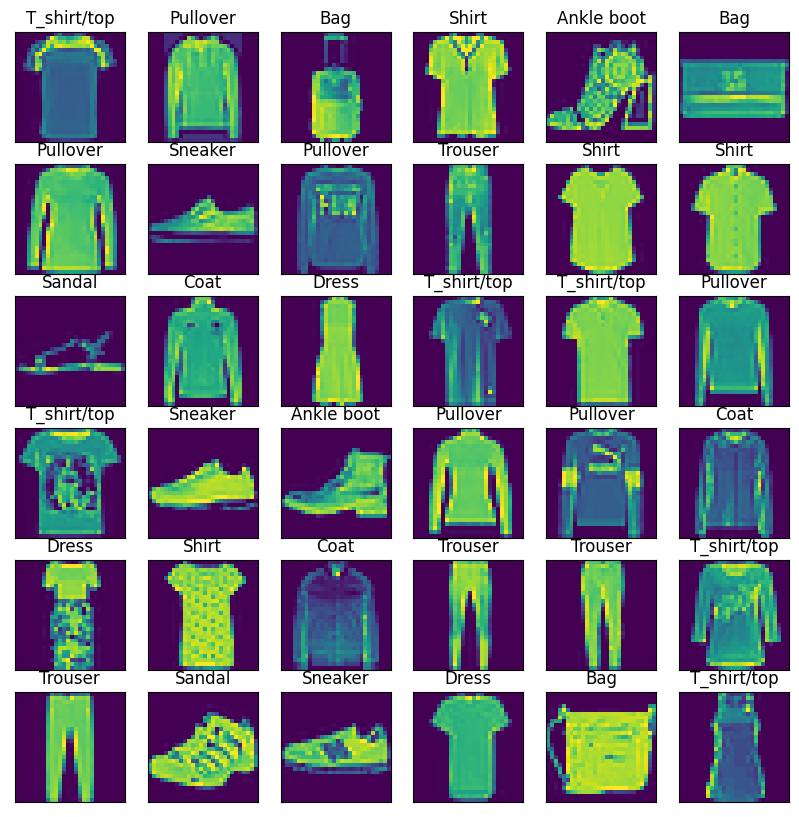

In [28]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

28 * 28 because 28 * 28 = 784, the number of pixels!

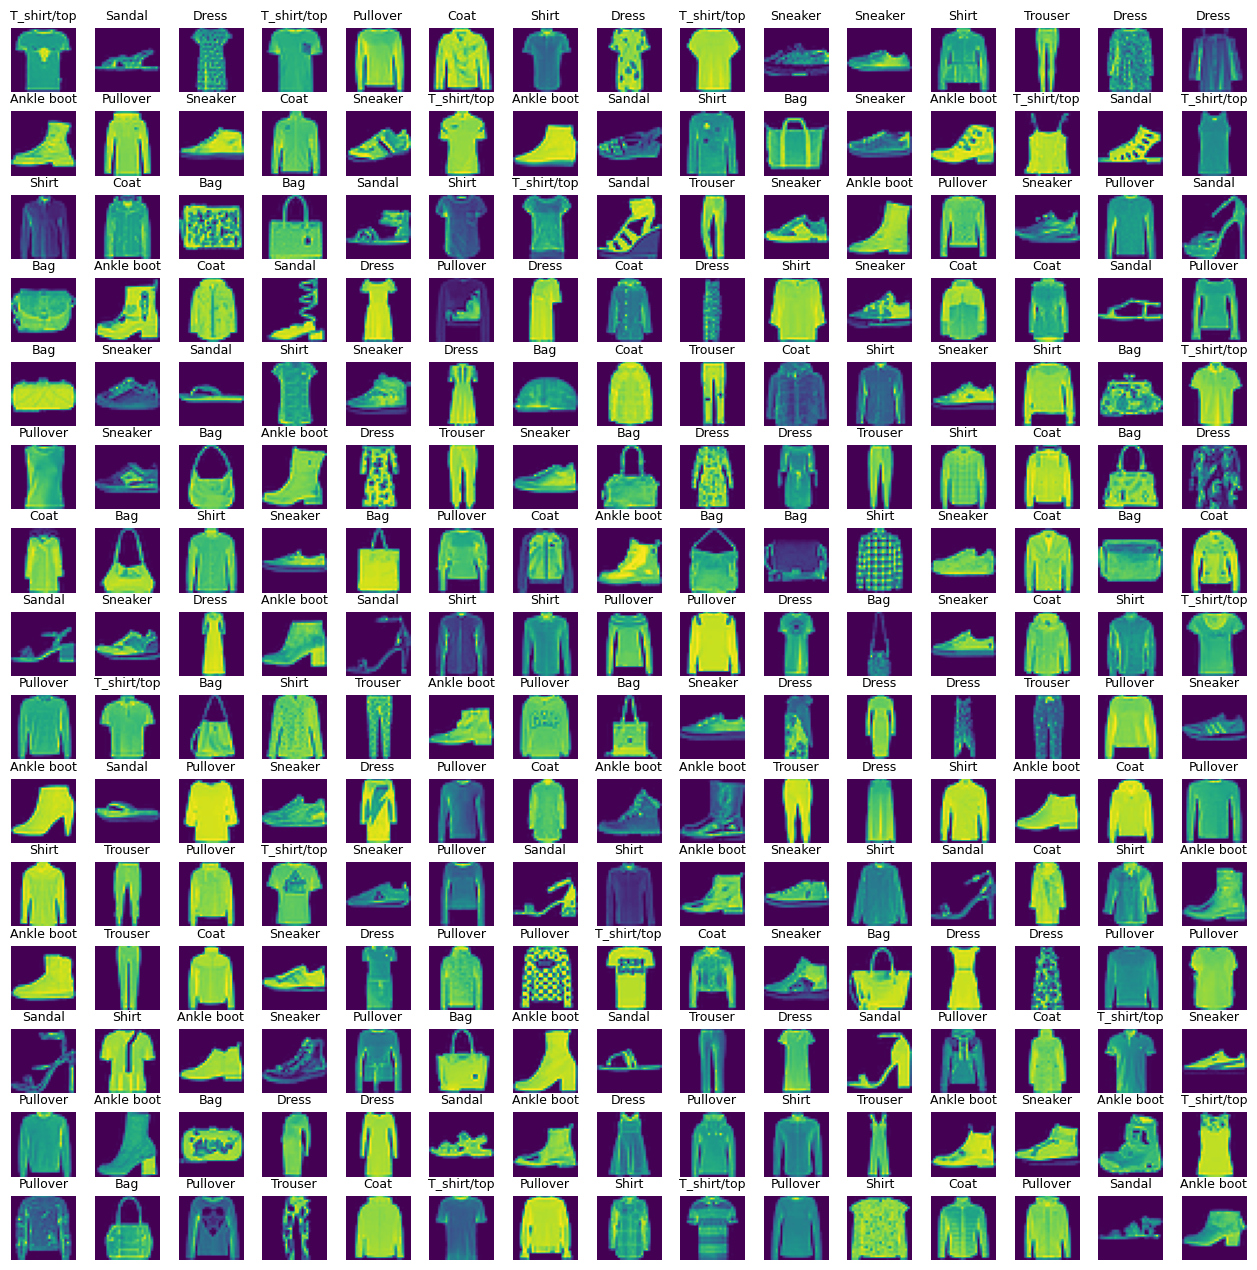

In [29]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [30]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

1 becuase image is grayscaled!

In [31]:
x_train.shape

(48000, 784)

In [32]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [33]:
x_train.shape

(48000, 28, 28, 1)

In [34]:
#Lets build a model with 2 Hidden Layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(5000,activation="relu"))
model.add(keras.layers.Dense(3000,activation="relu"))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 5000)              3925000   
                                                                 
 dense_5 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_6 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_7 (Dense)             (None, 100)               100100    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 22,030,110
Trainable params: 22,030,110


In [36]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [37]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [38]:
history = model.fit(x_train,y_train,epochs=200,validation_data=(x_validate,y_validate),callbacks=[es])

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6569 - accuracy: 0.7810 - val_loss: 0.5402 - val_accuracy: 0.7968
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8448 - val_loss: 0.4196 - val_accuracy: 0.8485
Epoch 3/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3929 - accuracy: 0.8611 - val_loss: 0.4158 - val_accuracy: 0.8480
Epoch 4/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3630 - accuracy: 0.8700 - val_loss: 0.3693 - val_accuracy: 0.8645
Epoch 5/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3403 - accuracy: 0.8776 - val_loss: 0.3631 - val_accuracy: 0.8651
Epoch 6/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3198 - accuracy: 0.8859 - val_loss: 0.3559 - val_accuracy: 0.8677
Epoch 7/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3030 - accuracy: 0.8904 - val_loss: 0.3393 - val_ac

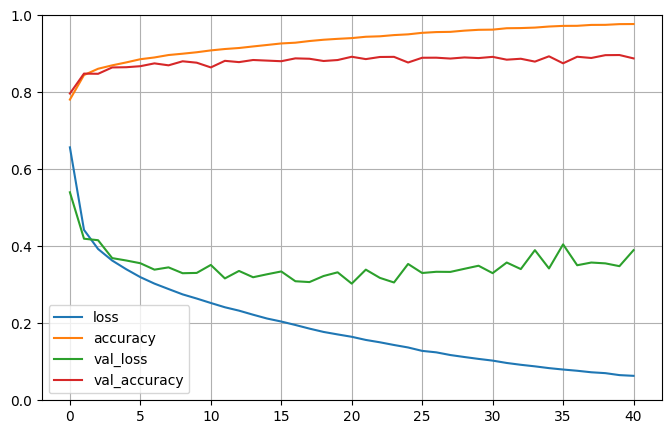

In [39]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [40]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3719 - accuracy: 0.8909


[0.3718596398830414, 0.8909000158309937]

In [46]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3719
Test Accuracy : 0.8909


In [47]:
# we test our model on just 15 images from the test set
X_new = x_test[:15]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 26ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.54, 0.  , 0.  , 0.  , 0.45, 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.21, 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.44, 0.3 , 0.13, 0.  , 0.13, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.03, 0.  , 0.96, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, 0.  , 0.33, 0.  , 0.61, 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.

In [48]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([0, 1, 2, 0, 3, 6, 8, 2, 5, 0, 3, 4, 6, 6, 8], dtype=int64)

In [49]:
np.array(class_names)[y_pred]

array(['T_shirt/top', 'Trouser', 'Pullover', 'T_shirt/top', 'Dress',
       'Shirt', 'Bag', 'Pullover', 'Sandal', 'T_shirt/top', 'Dress',
       'Coat', 'Shirt', 'Shirt', 'Bag'], dtype='<U11')

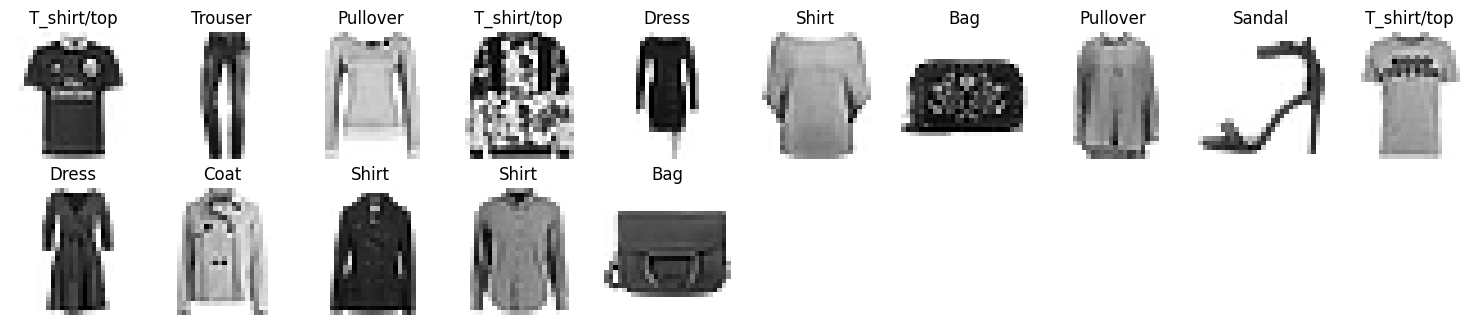

In [50]:
plt.figure(figsize=(15,8))
for i in range(15):
    plt.subplot(5,10,i+1)
    plt.imshow(X_new[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
    plt.title(class_names[y_pred[i]])
plt.tight_layout()
plt.show()